## Data Prep

### Import Data

In [250]:
from pandas import read_csv

TRACK_LENGTH = 3 #30 
N_MFCC = 13

# upload the file into colab
#csv_filepath = f"features_{TRACK_LENGTH}s_mfcc_{N_MFCC}_features.csv"
csv_filepath = f"mfcc_{N_MFCC}_features.csv"

df = read_csv(csv_filepath)
df.index = df["audio_filename"]
df

,genre,audio_filename,track_number,track_length,tempo,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,...,mfcc_9_mean,mfcc_9_var,mfcc_10_mean,mfcc_10_var,mfcc_11_mean,mfcc_11_var,mfcc_12_mean,mfcc_12_var,mfcc_13_mean,mfcc_13_var
audio_filename,,,,,,,,,,,,,,,,,,,,,
blues.00003.wav,blues,blues.00003.wav,1,66150,184.570312,0.370808,0.101094,0.139396,0.008855,860.884691,...,1.675927,61.995438,7.826920,20.708097,2.724468,44.178362,4.687434,21.066444,-1.762629,22.213202
blues.00003.wav,blues,blues.00003.wav,2,66150,184.570312,0.392528,0.097983,0.146827,0.007072,942.643334,...,1.940045,73.088735,10.509805,51.445806,2.555588,51.713564,2.676301,31.966742,-3.353952,26.757658
blues.00003.wav,blues,blues.00003.wav,3,66150,172.265625,0.421982,0.093878,0.138354,0.007181,900.400091,...,2.528621,58.519648,8.639396,54.621712,2.817707,87.654870,5.637195,35.064707,-1.170717,37.714007
blues.00003.wav,blues,blues.00003.wav,4,66150,172.265625,0.444949,0.086726,0.128848,0.004889,1127.108791,...,2.330631,80.602728,11.208480,67.322579,-1.419495,51.976195,6.767843,40.425017,-5.283739,37.988427
blues.00003.wav,blues,blues.00003.wav,5,66150,95.703125,0.401860,0.091431,0.125028,0.006552,1239.708352,...,-1.532882,112.928142,8.158582,118.461961,-5.862347,90.984214,7.487878,60.442422,-3.768867,74.654958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rock.00099.wav,rock,rock.00099.wav,6,66150,123.046875,0.348781,0.080553,0.049680,0.000098,1503.238680,...,-15.640490,38.817908,21.093968,33.846861,-2.613664,31.473927,9.415339,45.315603,-16.645523,52.715386
rock.00099.wav,rock,rock.00099.wav,7,66150,123.046875,0.372556,0.082633,0.057615,0.000096,1852.706841,...,-17.664928,45.678837,23.383934,95.642494,-4.787489,34.331206,11.375630,41.422453,-19.494057,40.094715
rock.00099.wav,rock,rock.00099.wav,8,66150,123.046875,0.347815,0.089140,0.051906,0.000674,1348.383673,...,-12.113999,37.789476,7.645655,68.863585,-1.772205,92.749396,7.259995,33.604659,-13.545742,28.969845


### Scale Data

In [251]:
labels = df[["genre", "audio_filename"]]
y = df["genre"]

x = df.drop(columns=["genre", "audio_filename", "track_length"])

feature_names = x.columns.tolist()
#print(features)

#print(x.iloc[0])
#x.head()

In [252]:
from sklearn.preprocessing import scale
from pandas import DataFrame

x_scaled = scale(x)
x_scaled = DataFrame(x_scaled, columns=feature_names)
x_scaled.index = x.index
x_scaled

,track_number,tempo,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc_9_mean,mfcc_9_var,mfcc_10_mean,mfcc_10_var,mfcc_11_mean,mfcc_11_var,mfcc_12_mean,mfcc_12_var,mfcc_13_mean,mfcc_13_var
audio_filename,,,,,,,,,,,,,,,,,,,,,
blues.00003.wav,-1.566273,2.579773,-0.101128,1.675665,0.137183,1.735915,-1.786745,-0.759694,-1.604474,-0.431974,...,0.987283,-0.279256,-0.047080,-1.154937,1.180803,-0.490815,-0.028849,-0.981808,0.479229,-0.980069
blues.00003.wav,-1.217863,2.579773,0.138562,1.354169,0.246190,1.235327,-1.677812,-0.624759,-1.568580,0.004410,...,1.015560,-0.030506,0.256994,-0.417787,1.159151,-0.302706,-0.295318,-0.690202,0.255640,-0.852514
blues.00003.wav,-0.869453,2.041936,0.463588,0.929898,0.121897,1.265803,-1.734095,-0.738197,-1.617968,-0.131130,...,1.078575,-0.357196,0.045005,-0.341623,1.192757,0.594533,0.096991,-0.607325,0.562395,-0.544989
blues.00003.wav,-0.521044,2.041936,0.717028,0.190656,-0.017569,0.622399,-1.432035,-0.490103,-1.057596,0.886060,...,1.057377,0.137985,0.336181,-0.037032,0.649509,-0.296150,0.246798,-0.463926,-0.015503,-0.537287
blues.00003.wav,-0.172634,-1.304607,0.241537,0.676966,-0.073608,1.089135,-1.282010,-0.445376,-0.915538,0.922142,...,0.643740,0.862835,-0.009490,1.189390,0.079894,0.677647,0.342201,0.071582,0.197343,0.491878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rock.00099.wav,0.175776,-0.109413,-0.344194,-0.447371,-1.178976,-0.722984,-0.930889,-0.581835,-0.958696,-0.327585,...,-0.866658,-0.798978,1.456586,-0.839844,0.496405,-0.807968,0.597583,-0.333092,-1.611886,-0.123927
rock.00099.wav,0.524186,-0.109413,-0.081832,-0.232376,-1.062565,-0.723405,-0.465267,-0.319564,-0.609676,-0.208866,...,-1.083400,-0.645132,1.716127,0.642135,0.217701,-0.736639,0.857315,-0.437242,-2.012117,-0.478167
rock.00099.wav,0.872595,-0.109413,-0.354852,0.440140,-1.146323,-0.561230,-1.137214,0.567885,-1.251545,0.195330,...,-0.489102,-0.822039,-0.067624,-0.000075,0.604288,0.721713,0.312007,-0.646384,-1.176352,-0.790422


In [253]:
x_scaled.describe()

,track_number,tempo,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc_9_mean,mfcc_9_var,mfcc_10_mean,mfcc_10_var,mfcc_11_mean,mfcc_11_var,mfcc_12_mean,mfcc_12_var,mfcc_13_mean,mfcc_13_var
count,9.980000e+03,9.980000e+03,9980.000000,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03,...,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03,9.980000e+03
mean,-1.208563e-16,7.974027e-17,0.000000,-9.056216e-16,2.135900e-17,1.139147e-17,-4.129407e-16,-4.556587e-17,2.107421e-16,4.556587e-17,...,7.404453e-17,1.623284e-16,-1.010993e-16,2.392208e-16,8.543600e-17,6.834880e-17,9.540353e-17,4.043971e-16,5.695733e-18,-8.828387e-17
std,1.000050e+00,1.000050e+00,1.000050,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,...,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.566273e+00,-3.826818e+00,-3.000410,-7.200482e+00,-1.893897e+00,-7.504264e-01,-2.294351e+00,-9.534253e-01,-3.222999e+00,-1.167305e+00,...,-3.405587e+00,-1.484163e+00,-4.655763e+00,-1.479481e+00,-4.303080e+00,-1.472500e+00,-3.808362e+00,-1.496736e+00,-3.386824e+00,-1.388552e+00
25%,-8.694533e-01,-7.817100e-01,-0.705133,-5.230961e-01,-6.862674e-01,-5.738589e-01,-7.566446e-01,-6.753748e-01,-6.546168e-01,-6.873715e-01,...,-7.478411e-01,-6.999100e-01,-7.414925e-01,-6.854249e-01,-7.306755e-01,-6.518749e-01,-7.082941e-01,-6.205859e-01,-7.225667e-01,-6.265503e-01
50%,-1.726339e-01,-1.094135e-01,0.057318,2.573107e-02,-1.401411e-01,-3.291030e-01,1.311655e-02,-3.492565e-01,-2.090797e-02,-2.786306e-01,...,-4.535307e-02,-2.645201e-01,-1.624934e-02,-2.309936e-01,2.471462e-02,-2.482045e-01,-3.102584e-02,-2.253325e-01,5.185291e-02,-2.359778e-01
75%,8.725953e-01,4.567310e-01,0.695438,6.483342e-01,6.644553e-01,1.238703e-01,6.815823e-01,3.349523e-01,6.386233e-01,3.948195e-01,...,7.626880e-01,4.315172e-01,7.953899e-01,4.067463e-01,7.264769e-01,3.868696e-01,7.595687e-01,3.233807e-01,7.042277e-01,3.419223e-01
max,1.569415e+00,3.924366e+00,4.096250,3.703960e+00,4.553838e+00,8.341257e+00,4.304059e+00,1.010661e+01,2.703463e+00,1.116035e+01,...,4.245748e+00,7.510881e+00,5.681586e+00,1.000607e+01,6.816007e+00,1.581943e+01,6.107806e+00,1.384729e+01,5.797820e+00,1.444323e+01


### Feature Correlation

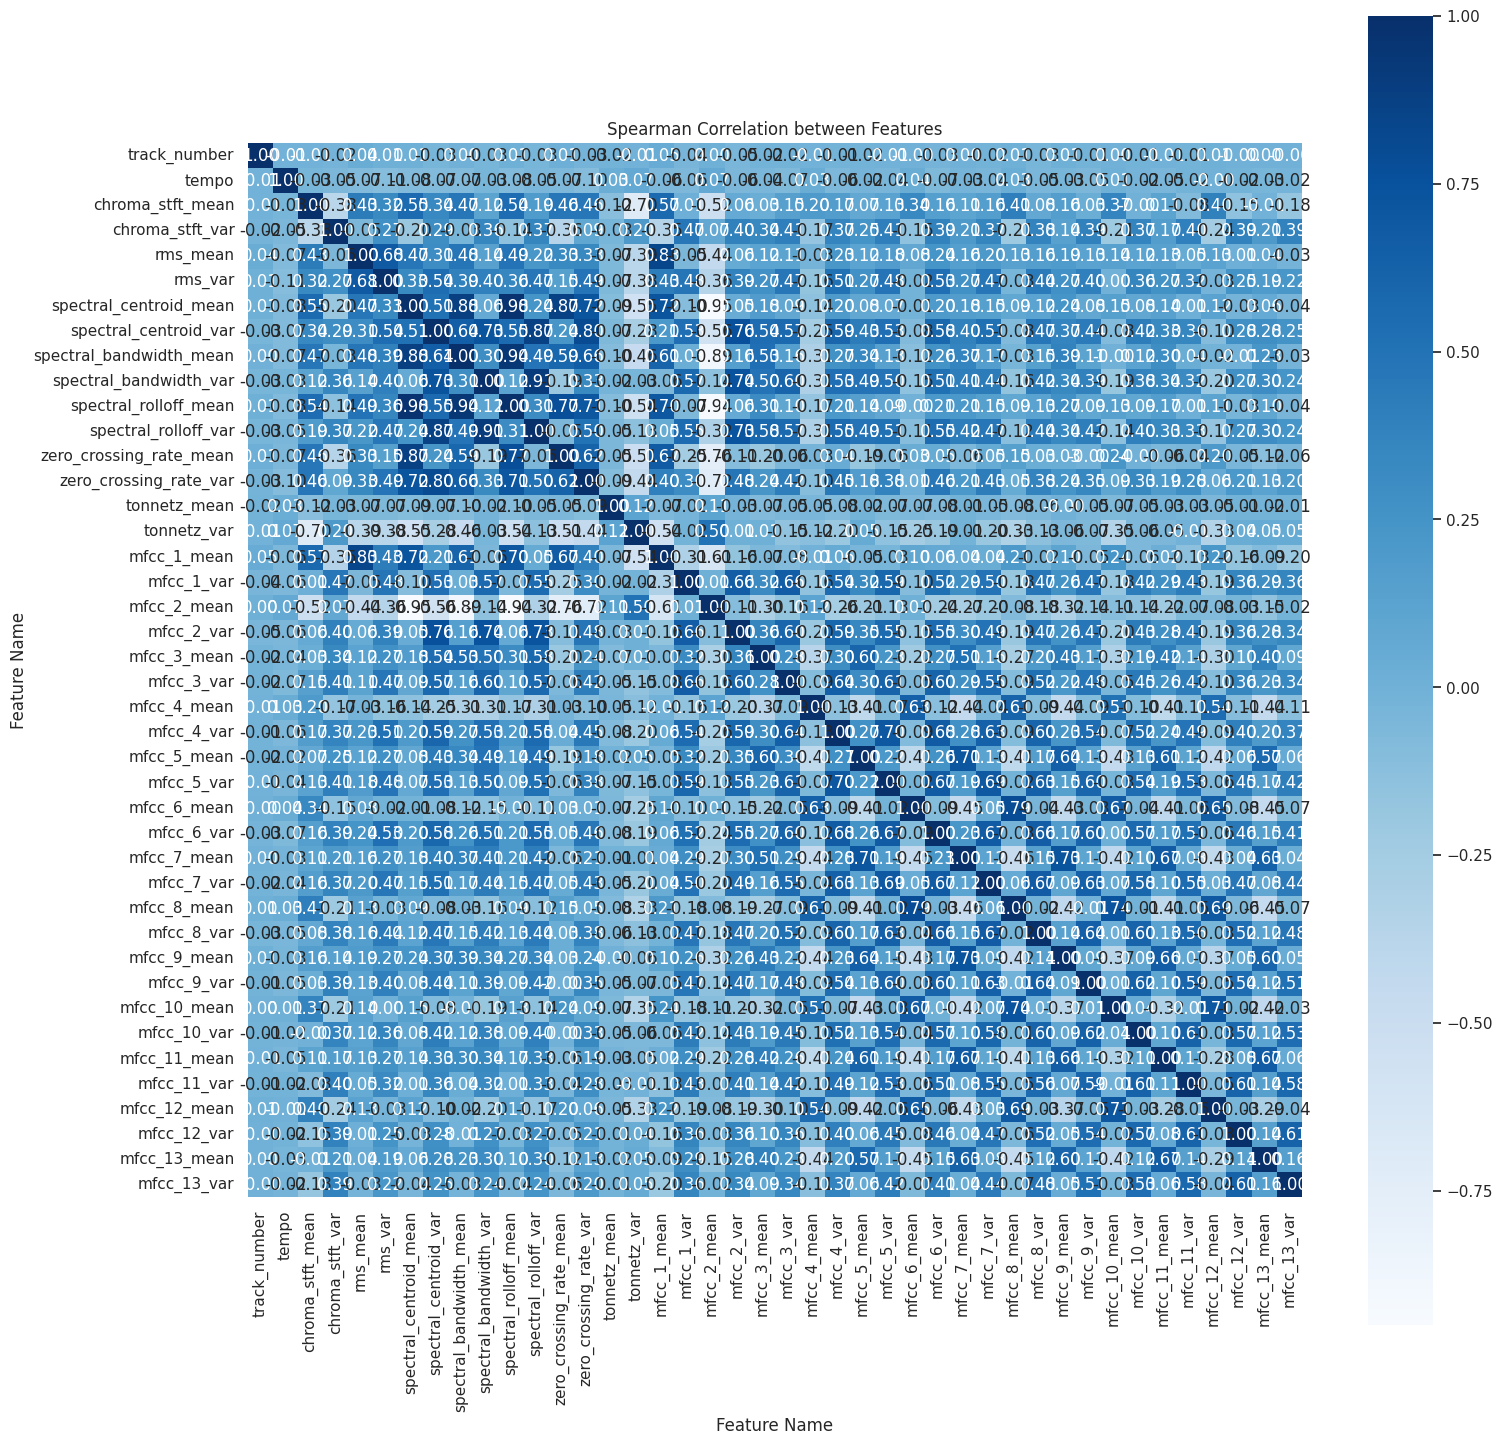

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

mat = x_scaled.corr(method="spearman")

sns.set(rc = {'figure.figsize':(17,17)})
sns.heatmap(mat, 
            square=True, annot=True, fmt=".2f",
            cbar=True, cmap="Blues"
        )

plt.xlabel("Feature Name")
plt.ylabel("Feature Name")
plt.title("Spearman Correlation between Features")

plt.show()

## Dimensionality Reduction

In [255]:
def plot_embeddings(x_scaled, embeddings, track_length, n_mfcc, n_components, model_type, chart=True):

    component_names = [f"component_{i}" for i in range(1, n_components+1)]
    embeddings_df = DataFrame(embeddings, columns=component_names)
    embeddings_df.index = x_scaled.index
    embeddings_df["audio_filename"] = x_scaled.index
    embeddings_df["genre"] = embeddings_df["audio_filename"].apply(lambda audio_filename: audio_filename.split(".")[0])
    #print(embeddings_df.head())
    #csv_filepath = os.path.join(DATA_DIRPATH, f"gtzan_songs_{TRACK_LENGTH}s_mfcc{N_MFCC}_pca_{n_components}.csv")
    #embeddings_df.to_csv(csv_filepath)
 
    if chart:
        title = f"""GTZAN Genre Classifier - Dimensionality Reduction ({model_type} n_components={n_components})
            <br><sup>Data: {track_length}s tracks, {n_mfcc} MFCCs</sup>
        """
        chart_params = dict(x="component_1", y="component_2", 
                    color="genre", #, hover_data="audio_filename"
                    title=title, height=500,
        )
        if n_components == 2:
            fig = px.scatter(embeddings_df, **chart_params)
            fig.show()

        elif n_components ==3:
            chart_params["z"] = "component_3"
            fig = px.scatter_3d(embeddings_df, **chart_params)
            fig.show()
    
    return embeddings_df

### PCA

In [256]:
#n_components=2
#
#pca = PCA(n_components=n_components, random_state=99)
#
#embeddings = pca.fit_transform(x_scaled)
#print("EMBEDDINGS:", type(embeddings), embeddings.shape)
#print("EXPLAINED VARIANCE RATIO:", pca.explained_variance_ratio_)
#print("SINGULAR VALS:", pca.singular_values_)

In [257]:
#component_names = [f"component_{i}" for i in range(1, n_components+1)]
#embeddings_df = DataFrame(embeddings, columns=component_names)
#embeddings_df.index = x_scaled.index
#embeddings_df["audio_filename"] = x_scaled.index
#embeddings_df["genre"] = embeddings_df["audio_filename"].apply(lambda audio_filename: audio_filename.split(".")[0])
#
#print(len(embeddings_df))
#print(embeddings_df.head())
##csv_filepath = os.path.join(DATA_DIRPATH, f"profile_tags_{TOP_TAGS_LIMIT}_pca_{n_components}.csv")
##embeddings_df.to_csv(csv_filepath)

In [258]:
#import plotly.express as px
#
#title = "GTZAN Dataset - Song Similarity"
#px.scatter(embeddings_df, x="component_1", y="component_2", title=title,
#           color="genre" #, hover_data="audio_filename"
#)

In [259]:
import os
from pandas import DataFrame
from sklearn.decomposition import PCA
import plotly.express as px


def pca_pipeline(x_scaled=x_scaled, n_components=2, track_length=TRACK_LENGTH, n_mfcc=N_MFCC):

    pca = PCA(n_components=n_components, random_state=99)

    embeddings = pca.fit_transform(x_scaled)
    print("EMBEDDINGS:", type(embeddings), embeddings.shape)
    print("EXPLAINED VARIANCE RATIO:", pca.explained_variance_ratio_)
    print("SINGULAR VALS:", pca.singular_values_)

    embeds_df = plot_embeddings(x_scaled, embeddings, track_length, n_mfcc, n_components, "PCA")
    return pca, embeds_df 


pca_pipeline(n_components=2)

EMBEDDINGS: <class 'numpy.ndarray'> (9980, 2)
EXPLAINED VARIANCE RATIO: [0.24088395 0.15944291]
SINGULAR VALS: [317.75606173 258.51903467]


(PCA(n_components=2, random_state=99),
                  component_1  component_2   audio_filename  genre
 audio_filename                                                   
 blues.00003.wav    -1.207708    -3.196130  blues.00003.wav  blues
 blues.00003.wav    -0.609947    -3.108231  blues.00003.wav  blues
 blues.00003.wav    -0.807810    -3.054940  blues.00003.wav  blues
 blues.00003.wav    -0.000045    -2.214118  blues.00003.wav  blues
 blues.00003.wav     0.990745    -2.718025  blues.00003.wav  blues
 ...                      ...          ...              ...    ...
 rock.00099.wav     -3.662134    -0.985511   rock.00099.wav   rock
 rock.00099.wav     -2.939037    -0.176184   rock.00099.wav   rock
 rock.00099.wav      1.068194    -3.523580   rock.00099.wav   rock
 rock.00099.wav     -3.765624     0.660653   rock.00099.wav   rock
 rock.00099.wav     -2.147366    -1.066865   rock.00099.wav   rock
 
 [9980 rows x 4 columns])

In [260]:
pca_pipeline(n_components=3)

EMBEDDINGS: <class 'numpy.ndarray'> (9980, 3)
EXPLAINED VARIANCE RATIO: [0.24088395 0.15944291 0.1129833 ]
SINGULAR VALS: [317.75606173 258.51903467 217.61911506]


(PCA(n_components=3, random_state=99),
                  component_1  component_2  component_3   audio_filename  genre
 audio_filename                                                                
 blues.00003.wav    -1.207708    -3.196130    -1.466096  blues.00003.wav  blues
 blues.00003.wav    -0.609947    -3.108231    -0.539236  blues.00003.wav  blues
 blues.00003.wav    -0.807810    -3.054940    -0.735665  blues.00003.wav  blues
 blues.00003.wav    -0.000045    -2.214118     0.674043  blues.00003.wav  blues
 blues.00003.wav     0.990745    -2.718025     1.574869  blues.00003.wav  blues
 ...                      ...          ...          ...              ...    ...
 rock.00099.wav     -3.662134    -0.985511     0.527684   rock.00099.wav   rock
 rock.00099.wav     -2.939037    -0.176184     1.177324   rock.00099.wav   rock
 rock.00099.wav      1.068194    -3.523580     2.325764   rock.00099.wav   rock
 rock.00099.wav     -3.765623     0.660653     1.133886   rock.00099.wav   rock
 

#### PCA Tuning

In [261]:
import numpy as np

pca_results = []
for n_components in range(1, len(x_scaled.columns)+1):

    pca = PCA(n_components=n_components, random_state=99)

    embeddings = pca.fit_transform(x_scaled)
    #print("COMPONENTS:", pca.components_.shape) # EIGEN VECTORS #> (2, 10)
    #print("FEATURE NAMES:", pca.feature_names_in_)
    #print("EMBEDDINGS:", embeddings.shape) #> (28, 2)
    #print("EXPLAINED VARIANCE:", pca.explained_variance_.shape) #> (2,)
    #print("EXPLAINED VARIANCE RATIO:", pca.explained_variance_ratio_.shape) #> (2,)
    #print("SINGULAR VALS:", pca.singular_values_.shape) #> (2,)

    # https://stackoverflow.com/a/44728692/670433
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    # print("LOADINGS:", loadings.shape) #> (10, 2)

    #print("EIGENVAL:")
    pca_results.append({
        "n_components": n_components,
        "explained_variance": pca.explained_variance_ratio_.sum(),
        "eigenvals": pca.explained_variance_, # number of vals depend on n components
        "loadings": loadings,
        "embeddings": embeddings
    })


pca_results_df = DataFrame(pca_results)
pca_results_df[["n_components", "explained_variance"]].head()

,n_components,explained_variance
0,1,0.240884
1,2,0.400327
2,3,0.513310
3,4,0.568120
4,5,0.606146


In [262]:
title = f"""Total Explained Variance by Number of Components (PCA)
<br><sup>Data: {TRACK_LENGTH}s tracks, {N_MFCC} MFCCs</sup>
"""
fig = px.line(pca_results_df, x="n_components", y="explained_variance", 
        title=title,
        markers="line+point", color_discrete_sequence=["steelblue"]
)
fig.show()

Looks like around 90% of the variance is explained with 9 features, 90% of the variance is explained with 12.

In [263]:
eigenvals = pca_results_df.sort_values(by=["n_components"], ascending=False).iloc[0]["eigenvals"]
print("EIGENVALS:", eigenvals)

component_numbers = list(range(1, len(pca_results_df)+1))
print("COMPONENT NUMBERS:", component_numbers)

title=f"""Scree Plot of Eigenvalues by Component (PCA)
<br><sup>Data: {TRACK_LENGTH}s tracks, {N_MFCC} MFCCs</sup>
"""
fig = px.line(x=component_numbers, y=eigenvals, 
        title=title,
        labels={"x": "Component Number", "y": "Eigenvalue"},
        markers="line+point", color_discrete_sequence=["steelblue"]
)
fig.show()
# RETAIN ALL BEFORE THE ELBOW

EIGENVALS: [1.01181396e+01 6.69727340e+00 4.74577405e+00 2.30225175e+00
 1.59740533e+00 1.36749145e+00 1.16900521e+00 1.03984594e+00
 1.00610170e+00 9.88152751e-01 8.67297326e-01 7.88659420e-01
 6.93431828e-01 5.82646577e-01 5.57207878e-01 5.36365015e-01
 5.22377239e-01 4.93008605e-01 4.78044882e-01 4.53359667e-01
 4.26751770e-01 4.07712537e-01 4.01707151e-01 3.87455577e-01
 3.78696314e-01 3.64166488e-01 3.40118244e-01 3.04112982e-01
 2.91963319e-01 2.65124024e-01 2.60083147e-01 2.41078680e-01
 1.92210615e-01 1.86535495e-01 1.82770376e-01 1.23654253e-01
 7.71370126e-02 7.16935980e-02 5.17138605e-02 3.41944051e-02
 7.93817369e-03 3.55122600e-03]
COMPONENT NUMBERS: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


For 30 second tracks and 13 MFCCs, looks like we could keep six to nine components. 

### T-SNE

T-SNE is slow.

In [264]:
import os
from pandas import DataFrame
from sklearn.manifold import TSNE
import plotly.express as px


def tsne_pipeline(x_scaled=x_scaled, n_components=2, track_length=TRACK_LENGTH, n_mfcc=N_MFCC):

    tsne = TSNE(n_components=n_components, random_state=99)

    embeddings = tsne.fit_transform(x_scaled)
    print("EMBEDDINGS:", type(embeddings), embeddings.shape)
    print("K-L DIVERGENCE:", tsne.kl_divergence_)

    plot_embeddings(x_scaled, embeddings, track_length, n_mfcc, n_components, "T-SNE")



tsne_pipeline(n_components=2)

EMBEDDINGS: <class 'numpy.ndarray'> (9980, 2)
K-L DIVERGENCE: 1.811155080795288


In [265]:
#tsne_pipeline(n_components=3)

### UMAP

In [266]:
%%capture
!pip install umap-learn[plot]

In [267]:
from umap import UMAP


def umapper(x_scaled=x_scaled, n_components=2, track_length=TRACK_LENGTH, n_mfcc=N_MFCC):

    reducer = UMAP(n_components=n_components, random_state=99)
    embeddings = reducer.fit_transform(x_scaled)

    embeds_df = plot_embeddings(x_scaled, embeddings, track_length, n_mfcc, n_components, "UMAP")

    return reducer, embeds_df


umapper(n_components=2)

(UMAP(random_state=99, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}),
                  component_1  component_2   audio_filename  genre
 audio_filename                                                   
 blues.00003.wav    10.241685     4.094258  blues.00003.wav  blues
 blues.00003.wav    10.257925     4.145460  blues.00003.wav  blues
 blues.00003.wav    10.249276     4.099164  blues.00003.wav  blues
 blues.00003.wav    10.829011     3.851829  blues.00003.wav  blues
 blues.00003.wav    10.876204     3.415370  blues.00003.wav  blues
 ...                      ...          ...              ...    ...
 rock.00099.wav      8.634347     3.517134   rock.00099.wav   rock
 rock.00099.wav      8.684233     3.307393   rock.00099.wav   rock
 rock.00099.wav     10.639860     4.398356   rock.00099.wav   rock
 rock.00099.wav      9.219419    -0.039446   rock.00099.wav   rock
 rock.00099.wav      8.687990   

In [268]:
umapper(n_components=3)

(UMAP(n_components=3, random_state=99, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}),
                  component_1  component_2  component_3   audio_filename  genre
 audio_filename                                                                
 blues.00003.wav    11.177364     4.621166     2.408494  blues.00003.wav  blues
 blues.00003.wav    11.157620     4.676607     2.363312  blues.00003.wav  blues
 blues.00003.wav    11.166906     4.594211     2.381706  blues.00003.wav  blues
 blues.00003.wav    11.383438     4.458674     1.791248  blues.00003.wav  blues
 blues.00003.wav    11.320388     4.106348     1.525098  blues.00003.wav  blues
 ...                      ...          ...          ...              ...    ...
 rock.00099.wav     10.411118     3.272929     3.595466   rock.00099.wav   rock
 rock.00099.wav     10.410633     3.170304     3.394856   rock.00099.wav   rock
 rock.00099.wav     

## Clustering

https://scikit-learn.org/stable/modules/clustering.html

Let's use a higher dimension dataset, like the original scaled data, or a reduced version with the optimal number of components we saw from the PCA tuning.

In [269]:
N_COMPONENTS = 7

pca, embeds_df = pca_pipeline(n_components=N_COMPONENTS)
embeds_df.head()

#umap, embeds_df = umapper(n_components=N_COMPONENTS)
#embeds_df

EMBEDDINGS: <class 'numpy.ndarray'> (9980, 7)
EXPLAINED VARIANCE RATIO: [0.24088395 0.15944291 0.1129833  0.05480999 0.03802789 0.03254861
 0.02780657]
SINGULAR VALS: [317.75606173 258.51903465 217.61911501 151.57227111 126.25281106
 116.80358281 107.96019013]


,component_1,component_2,component_3,component_4,component_5,component_6,component_7,audio_filename,genre
audio_filename,,,,,,,,,
blues.00003.wav,-1.207708,-3.196130,-1.466101,-2.174760,-1.674942,-1.325899,0.179130,blues.00003.wav,blues
blues.00003.wav,-0.609947,-3.108221,-0.539205,-2.350609,-1.577395,-1.275907,0.647784,blues.00003.wav,blues
blues.00003.wav,-0.807809,-3.054955,-0.735707,-1.942066,-2.063209,-0.931063,0.691342,blues.00003.wav,blues
blues.00003.wav,-0.000041,-2.214073,0.674136,-2.229988,-0.847098,-0.883154,-0.082622,blues.00003.wav,blues
blues.00003.wav,0.990748,-2.717988,1.574980,-0.689116,-0.988898,-0.966843,-0.542192,blues.00003.wav,blues


In [270]:
from sklearn.model_selection import train_test_split

# use original data:
#x_cluster = x_scaled
#y_cluster = y

# use reduced data:
x_cluster = embeds_df.drop(columns=["genre", "audio_filename"])
y_cluster = embeds_df["genre"]

x_train, x_test, y_train, y_test = train_test_split(x_cluster, y_cluster, shuffle=True, random_state=99)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7485, 7)
(7485,)
(2495, 7)
(2495,)


In [271]:
x_test.columns

Index(['component_1', 'component_2', 'component_3', 'component_4',
       'component_5', 'component_6', 'component_7'],
      dtype='object')

### KMeans

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [272]:
from sklearn.cluster import KMeans
import numpy as np

N_CLUSTERS = 10

kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=99, n_init="auto")
kmeans.fit(x_train)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

y_pred = kmeans.predict(x_test)
print("TRUE:", y_test.values[0:10])
print("PRED:", y_pred[0:10])

TRUE: ['disco' 'classical' 'metal' 'reggae' 'classical' 'disco' 'country'
 'country' 'country' 'hiphop']
PRED: [9 7 5 4 7 3 7 9 8 2]


In [273]:
#feature_names = kmeans.get_feature_names_out()
#feature_names

In [274]:
preds_df = DataFrame()
preds_df["audio_filename"] = y_test.index
preds_df["genre"] = y_test.values
preds_df["kmeans_cluster_id"] = ["cluster_" + str(cluster_id) for cluster_id in y_pred]
preds_df.head()

,audio_filename,genre,kmeans_cluster_id
0,disco.00069.wav,disco,cluster_9
1,classical.00016.wav,classical,cluster_7
2,metal.00007.wav,metal,cluster_5
3,reggae.00008.wav,reggae,cluster_4
4,classical.00051.wav,classical,cluster_7


In [275]:

for genre in preds_df["genre"].unique().tolist():
    print("---------------")
    preds = preds_df[preds_df["genre"] == genre]
    print(f"GENRE {genre} .... ({len(preds)} members):")
    print(preds["kmeans_cluster_id"].value_counts())

---------------
GENRE disco .... (255 members):
cluster_1    89
cluster_3    68
cluster_5    41
cluster_2    27
cluster_9    11
cluster_4    11
cluster_8     5
cluster_6     2
cluster_7     1
Name: kmeans_cluster_id, dtype: int64
---------------
GENRE classical .... (242 members):
cluster_7    155
cluster_9     41
cluster_0     34
cluster_8      7
cluster_1      2
cluster_3      2
cluster_2      1
Name: kmeans_cluster_id, dtype: int64
---------------
GENRE metal .... (256 members):
cluster_5    206
cluster_3     26
cluster_9     11
cluster_1      7
cluster_4      5
cluster_2      1
Name: kmeans_cluster_id, dtype: int64
---------------
GENRE reggae .... (248 members):
cluster_4    69
cluster_2    59
cluster_8    49
cluster_6    25
cluster_1    19
cluster_3    17
cluster_9     4
cluster_0     3
cluster_5     3
Name: kmeans_cluster_id, dtype: int64
---------------
GENRE country .... (254 members):
cluster_8    81
cluster_1    43
cluster_9    40
cluster_3    34
cluster_4    16
cluster_7   

In [276]:

for cluster_id in range(1, N_CLUSTERS+1):
    print("---------------")
    preds = preds_df[preds_df["kmeans_cluster_id"] == f"cluster_{cluster_id}"]
    print(f"CLUSTER ID {cluster_id} .... ({len(preds)} members):")
    print(preds["genre"].value_counts())

---------------
CLUSTER ID 1 .... (428 members):
pop          120
disco         89
rock          61
jazz          49
country       43
hiphop        38
reggae        19
metal          7
classical      2
Name: genre, dtype: int64
---------------
CLUSTER ID 2 .... (224 members):
reggae       59
hiphop       48
pop          47
disco        27
rock         21
country      12
jazz          8
classical     1
metal         1
Name: genre, dtype: int64
---------------
CLUSTER ID 3 .... (286 members):
disco        68
blues        55
hiphop       49
country      34
rock         34
metal        26
reggae       17
classical     2
jazz          1
Name: genre, dtype: int64
---------------
CLUSTER ID 4 .... (184 members):
reggae     69
blues      39
hiphop     32
country    16
disco      11
rock        9
metal       5
pop         2
jazz        1
Name: genre, dtype: int64
---------------
CLUSTER ID 5 .... (412 members):
metal      206
rock        77
blues       47
disco       41
hiphop      24
country  

### Spectral Clustering

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering

In [277]:
from sklearn.cluster import SpectralClustering

N_CLUSTERS = 10

sc = SpectralClustering(n_clusters=N_CLUSTERS, assign_labels='discretize', random_state=0)
sc.fit(x_train)
#print(sc.labels_)
print(sc.n_features_in_)
print(sc.feature_names_in_)

#y_pred = sc.predict(x_test)
#print("TRUE:", y_test.values[0:10])
#print("PRED:", y_pred[0:10])

7
['component_1' 'component_2' 'component_3' 'component_4' 'component_5'
 'component_6' 'component_7']


### DBSCAN

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

In [278]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(x_train)
cluster_labels = dbscan.labels_

#y_pred = dbscan.predict(x_test)
#print("TRUE:", y_test.values[0:10])
#print("PRED:", y_pred[0:10])

In [279]:
preds_df = DataFrame()
preds_df["audio_filename"] = y_train.index
preds_df["genre"] = y_train.values
preds_df["dbscan_cluster_id"] = cluster_labels # ["cluster_" + str(cluster_id) for cluster_id in cluster_labels]
preds_df.head()

,audio_filename,genre,dbscan_cluster_id
0,reggae.00029.wav,reggae,0
1,reggae.00025.wav,reggae,0
2,rock.00056.wav,rock,0
3,country.00087.wav,country,0
4,jazz.00060.wav,jazz,0


In [280]:

#for genre in preds_df["genre"].unique().tolist():
#    print("---------------")
#    preds = preds_df[preds_df["genre"] == genre]
#    print(f"GENRE {genre} .... ({len(preds)} members):")
#    print(preds["dbscan_cluster_id"].value_counts())

In [281]:
for cluster_id in sorted(preds_df["dbscan_cluster_id"].unique()):
    print("---------------")
    preds = preds_df[preds_df["dbscan_cluster_id"] == cluster_id] # f"cluster_{cluster_id}"
    print(f"CLUSTER {cluster_id}...") # ({len(preds)} members):
    print(preds["genre"].value_counts())

---------------
CLUSTER -1...
pop          19
hiphop       11
classical    10
rock          9
jazz          7
disco         3
reggae        3
country       2
metal         1
blues         1
Name: genre, dtype: int64
---------------
CLUSTER 0...
hiphop       755
blues        746
metal        743
country      741
reggae       740
classical    738
jazz         737
disco        737
rock         726
pop          725
Name: genre, dtype: int64
---------------
CLUSTER 1...
disco    2
Name: genre, dtype: int64
---------------
CLUSTER 2...
classical    4
Name: genre, dtype: int64
---------------
CLUSTER 3...
jazz         2
classical    1
Name: genre, dtype: int64
---------------
CLUSTER 4...
hiphop    2
Name: genre, dtype: int64
---------------
CLUSTER 5...
disco    2
Name: genre, dtype: int64
---------------
CLUSTER 6...
reggae    6
Name: genre, dtype: int64
---------------
CLUSTER 7...
pop    2
Name: genre, dtype: int64
---------------
CLUSTER 8...
hiphop       1
classical    1
Name: genre, dt

### HDBSCAN

In [282]:
%%capture
!pip install hdbscan

In [283]:
from hdbscan import HDBSCAN

hdbscan = HDBSCAN()
hdbscan.fit(x_train)
#print(hdbscan.labels_)

HDBSCAN()

In [284]:
preds_df = DataFrame()
preds_df["audio_filename"] = y_train.index
preds_df["genre"] = y_train.values
preds_df["hdbscan_label"] = hdbscan.labels_
preds_df["hdbscan_probability"] = hdbscan.probabilities_
preds_df.sort_values(by=["hdbscan_label"], inplace=True)
preds_df.head()

,audio_filename,genre,hdbscan_label,hdbscan_probability
3787,classical.00072.wav,classical,-1,0.0
3359,blues.00037.wav,blues,-1,0.0
1542,hiphop.00038.wav,hiphop,-1,0.0
5220,classical.00062.wav,classical,-1,0.0
5979,hiphop.00038.wav,hiphop,-1,0.0


In [285]:
preds_df["hdbscan_label"].unique()

array([-1,  0,  1,  2])

In [286]:
preds_df[preds_df["hdbscan_label"] == -1].sort_values(by="hdbscan_probability", ascending=False)

,audio_filename,genre,hdbscan_label,hdbscan_probability
3787,classical.00072.wav,classical,-1,0.0
4352,reggae.00079.wav,reggae,-1,0.0
806,country.00067.wav,country,-1,0.0
4530,disco.00084.wav,disco,-1,0.0
4382,pop.00011.wav,pop,-1,0.0
...,...,...,...,...
325,classical.00013.wav,classical,-1,0.0
1646,jazz.00091.wav,jazz,-1,0.0
5320,hiphop.00065.wav,hiphop,-1,0.0
319,classical.00012.wav,classical,-1,0.0


In [287]:
preds_df[preds_df["hdbscan_label"] == 0].sort_values(by="hdbscan_probability", ascending=False)

,audio_filename,genre,hdbscan_label,hdbscan_probability
4241,reggae.00086.wav,reggae,0,1.0
6112,reggae.00086.wav,reggae,0,1.0
6978,reggae.00086.wav,reggae,0,1.0
4651,reggae.00086.wav,reggae,0,1.0
5647,reggae.00086.wav,reggae,0,1.0
3496,reggae.00086.wav,reggae,0,1.0


In [288]:
preds_df[preds_df["hdbscan_label"] == 1].sort_values(by="hdbscan_probability", ascending=False)

,audio_filename,genre,hdbscan_label,hdbscan_probability
6495,reggae.00051.wav,reggae,1,1.000000
2013,reggae.00051.wav,reggae,1,1.000000
7250,reggae.00051.wav,reggae,1,1.000000
605,reggae.00051.wav,reggae,1,1.000000
2428,reggae.00051.wav,reggae,1,1.000000
5020,reggae.00051.wav,reggae,1,0.972877
4101,reggae.00051.wav,reggae,1,0.838973
4815,reggae.00051.wav,reggae,1,0.817750
281,reggae.00045.wav,reggae,1,0.645343
2659,reggae.00045.wav,reggae,1,0.555219


In [289]:
preds_df[preds_df["hdbscan_label"] == 2].sort_values(by="hdbscan_probability", ascending=False)

,audio_filename,genre,hdbscan_label,hdbscan_probability
1280,country.00011.wav,country,2,1.000000
398,hiphop.00075.wav,hiphop,2,1.000000
386,rock.00029.wav,rock,2,1.000000
387,jazz.00006.wav,jazz,2,1.000000
388,metal.00067.wav,metal,2,1.000000
...,...,...,...,...
4429,hiphop.00018.wav,hiphop,2,0.676783
5880,hiphop.00076.wav,hiphop,2,0.674759
2349,classical.00020.wav,classical,2,0.673773
7442,hiphop.00037.wav,hiphop,2,0.673568


In [290]:
preds_df[preds_df["hdbscan_label"] == 3].sort_values(by="hdbscan_probability", ascending=False)

,audio_filename,genre,hdbscan_label,hdbscan_probability


#### HDBSCAN Eval

In [291]:
#def cluster_eval(X_df=df_onehot, embed_df=embed_df, metric="euclidean"): 
#    print("-------------")
#    print("METRIC:", metric)
#
#    hdbscan = HDBSCAN(metric=metric)
#
#    hdbscan.fit(embed_df)
#    #print(hdbscan.labels_[0:25])
#    #print(hdbscan.probabilities_[0:25])
#
#    # EXPORT RESULTS TO CSV...
#    labels_df = embed_df.copy()
#    labels_df["hdbscan_label"] = hdbscan.labels_
#    labels_df["hdbscan_probability"] = hdbscan.probabilities_
#    labels_df.sort_values(by=["hdbscan_label"], inplace=True)
#    #print(labels_df.head())
#    print(labels_df["hdbscan_label"].value_counts())
#    #csv_filepath = os.path.join(DATA_DIRPATH, f"tags_users_onehot_{CLUSTERING_TAGS_LIMIT}_umap_{CLUSTERING_N_COMPONENTS}_cluster_hdbscan_{metric}.csv")
#    #labels_df.to_csv(csv_filepath)
#
#    # EVALUATION
#
#    labels = hdbscan.labels_
#
#    sh_score = metrics.silhouette_score(X_df, labels, metric='euclidean')
#    #print("SH SCORE:", sh_score) #> 0.0567
#
#    ch_score = metrics.calinski_harabasz_score(X_df, labels)
#    #print("CH SCORE:", ch_score) #> 2.5839
#
#    db_score = metrics.davies_bouldin_score(X_df, labels)
#    #print("DB SCORE:", db_score) #> 3.5719
#
#    # REPORT ON THE SCORES:
#    return {
#        "metric": metric,
#        "sh_score": sh_score,
#        "ch_score": ch_score,
#        "db_score": db_score
#    }
#     
#
DISTINCT_METRICS = [
 'braycurtis',       #: hdbscan.dist_metrics.BrayCurtisDistance,
 'canberra'       , #  : hdbscan.dist_metrics.CanberraDistance,
 'chebyshev'      , #  : hdbscan.dist_metrics.ChebyshevDistance,
 'dice'           , #  : hdbscan.dist_metrics.DiceDistance,
 'euclidean'      , #  : hdbscan.dist_metrics.EuclideanDistance,
 'hamming'        , #  : hdbscan.dist_metrics.HammingDistance,
 'haversine'      , #  : hdbscan.dist_metrics.HaversineDistance,
 'jaccard'        , #  : hdbscan.dist_metrics.JaccardDistance,
 'kulsinski'      , #  : hdbscan.dist_metrics.KulsinskiDistance,
 'mahalanobis'    , #  : hdbscan.dist_metrics.MahalanobisDistance,
 'manhattan'      , #  : hdbscan.dist_metrics.ManhattanDistance,
 'matching'       , #  : hdbscan.dist_metrics.MatchingDistance,
 'minkowski'      , #  : hdbscan.dist_metrics.MinkowskiDistance,
 'pyfunc'         , #  : hdbscan.dist_metrics.PyFuncDistance,
 'rogerstanimoto' , #  : hdbscan.dist_metrics.RogersTanimotoDistance,
 'russellrao'     , #  : hdbscan.dist_metrics.RussellRaoDistance,
 'seuclidean'     , #  : hdbscan.dist_metrics.SEuclideanDistance,
 'sokalmichener'  , #  : hdbscan.dist_metrics.SokalMichenerDistance,
 'sokalsneath'    , #  : hdbscan.dist_metrics.SokalSneathDistance,
 'wminkowski'     , #  : hdbscan.dist_metrics.WMinkowskiDistance}
]
#
#     
#
#
#eval_results = []
#for metric in DISTINCT_METRICS:
#
#    try:
#        result = cluster_eval(metric=metric)
#        eval_results.append(result)
#    except Exception as err:
#        #print("OOPS, ERROR...", err)
#        result = {"metric": metric, "err": err}
#        eval_results.append(result)
#
#eval_results_df = DataFrame(eval_results)
#eval_results_df

## Results and Interpretation

Doesn't look like we are getting good results for dimensionality reduction or clustering.